<a href="https://colab.research.google.com/github/tfranke0814/pytorch-deep-learning/blob/main/01_pytorch_workflow_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import torch, numpy as np
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.6.0+cu124'

In [6]:
what_were_covering = {1: "data (prepare and load)",
                      2: "build model",
                      3: "fitting the model to data (training)",
                      4: "making predictions and evaluating a model (inference)",
                      5: "saving and loading a model",
                      6: "putting it all together"}

what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

## 1. Data (Preparing and Loading)

Data could be almost anything in ML

- Excel spreadsheets
- Images
- Audio
- DNA
- Text

ML is a game of two parts
1. Get data into a numerical representation
2. Build a model to learn patterns in that numerical representation

\\
Linear Regression with *known* **parameters**

In [14]:
# "known" parameters
weight = 0.7
bias = 0.3

# Create data
start = 0; end = 1; step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
X[:10], y[:10], len(X), len(y), X.shape, y.shape

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50,
 torch.Size([50, 1]),
 torch.Size([50, 1]))

### Splitting data into train and test sets

Create Training and Test for our data.

In [17]:
# Create a train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

How to visualize the data???

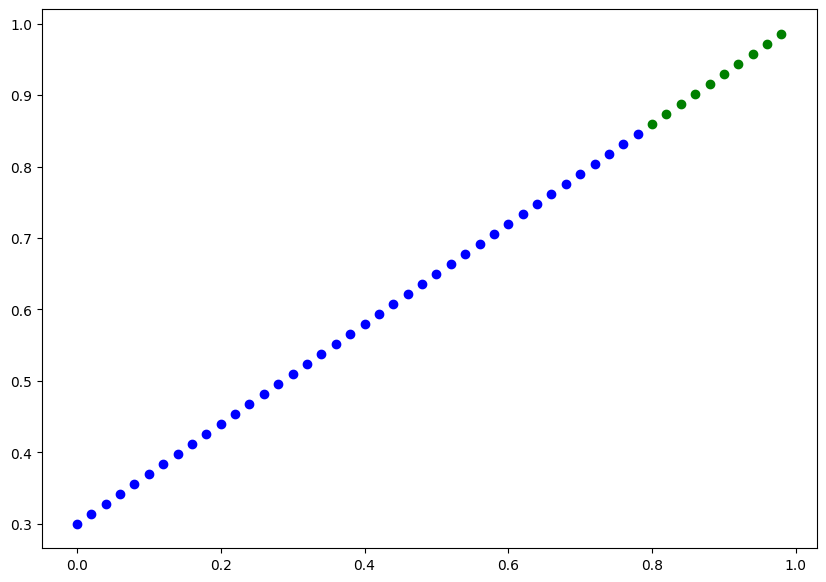

In [26]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, c="b", label="training data")
plt.scatter(X_test, y_test, c="g", label="testing data")
plt.show()

In [27]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  # Are there predictions?
  if predictions is not None:
    # Plot the predictions in red, if they exist
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});


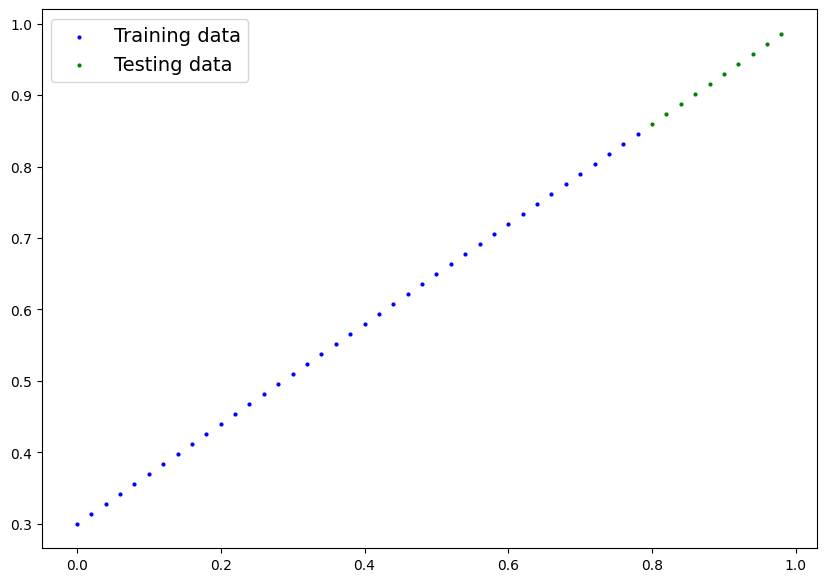

In [28]:
plot_predictions()

## 2. Build Model
What our model does:

Start with random values (weight & bias)
Look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weight & bias values we used to create the data)

Through two main algorithms:

1. Gradient descent - https://youtu.be/IHZwWFHWa-w \\
2. Backpropagation - https://youtu.be/Ilg3gGewQ5U

In [38]:
# Create linear regression model class
class LinearRegressionModel(nn.Module): # <- almost everyting in PyTorch inherits from nn.Module
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,
                                                requires_grad=True, # This is default
                                                dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1,
                                             requires_grad=True,
                                             dtype=torch.float))

        # Forward method to define the computation in the model
        def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data
            return self.weights * x + self.bias # this is the linear regression formula

In [40]:
# model = LinearRegressionModel()
# model.forward(X_train)

### PyTorch model building essentials

- torch.nn - contains all of the buildings for computational graphs (a neural network can be considered a computational graph)

- torch.nn.Parameter - what parameters should our model try and learn, often a PyTorch layer from torch.nn will set these for us

- torch.nn.Module - The base class for all neural network modules, if you subclass it, you should overwrite forward()

- torch.optim - this where the optimizers in PyTorch live, they will help with gradient descent

- def forward() - All nn.Module subclasses require you to overwrite forward(), this method defines what happens in the forward computation

5:25:58 - https://www.youtube.com/watch?v=LyJtbe__2i0&t=5h25m58s